# Disaster Relief Project Introduction

In Section 1, we will build a very simply classifier using handwritten rules instead of machine learning. This might not be as powerful as a machine learning-based classifier but will give us a chance to understand the pipeline of building a classifier and to learn how to evaluate the classifier's performance.

In this notebook we'll be:
*   Going over Python Syntax
*   Implementing Rule-Based Classifiers
*   Evaluating using Confusion Matrices

### Discussion Section

**Discuss:** Why might it be helpful to classify text during a disaster?


Let's import some libraries we will use!

In [ ]:
#@title Load your dataset { display-mode: "form" }
# Run this every time you open the spreadsheet

import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Disaster%20Relief/disaster_data.csv'

disaster_data.csv.1 100%[===================>] 231.23K  --.-KB/s    in 0.002s  


In [ ]:
#@title If the previous cell fails to load data, use this cell
import re
import seaborn as sns
import pandas as pd
import numpy as np
from torchtext.vocab import GloVe
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
import requests, io, zipfile

## Load and Inspect the data

To start off, let's take a closer look at the datasets we are providing you.

####Data Loading

In [ ]:
# Load the data.
disaster_tweets = pd.read_csv('disaster_data.csv',encoding ="ISO-8859-1")

In [ ]:
# This function prints out a table containing all the tweets, along with their category labels
disaster_tweets.head()

,tweet_id,text,category,need_or_resource
0,ca9e24c8-396d-4502-8b45-18895df5333e_0,"Donations of batteries, flashlights, and clean...",Energy,need
1,twitter_resource_tweets_1692,I want hurricane Sandy to cone so I can be stu...,None,NaN
2,625b46e2-0b81-41ea-826e-4535fe9b39b8,"Hi, I can help prepare food, serve food, offer...",Food,resource
3,twitter_resource_tweets_1699,I cant believe Sandy.....,None,NaN
4,c3bfea72-d377-445c-b4b8-e8ebca0e7fbb,I have children and adult clothes including ja...,Water,resource


In [ ]:
#Extract tweets and the respective labels from csv
tweet_set = disaster_tweets['text']
tweet_labels = disaster_tweets['category']

In [ ]:
#Split the data as train and test
X_train, X_test, y_train, y_test = train_test_split(tweet_set, tweet_labels, test_size=0.2, random_state=1)

**Discuss:** What are some interesting things you notice about the data? Do you agree with all of the labels?

### Is Our Data Balanced?

We are going to visualize how many tweets fall within each category.

Counter({'Food': 664, 'None': 384, 'Energy': 175, 'Water': 124, 'Medical': 54})


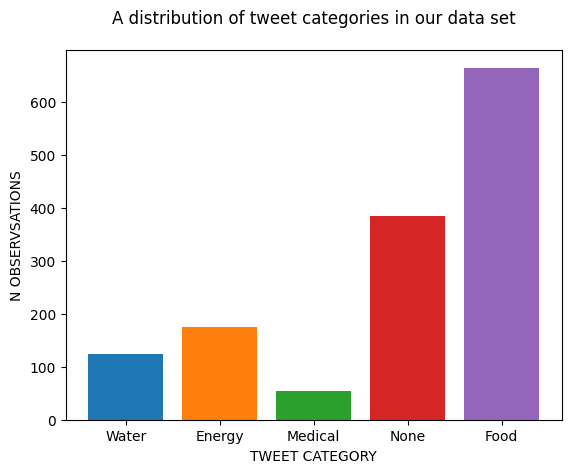

In [ ]:
# generate x labels for our plot
tweet_categories = list(set(tweet_labels))

# generate counts for each tweet type
category_counts = [np.sum(disaster_tweets["category"] == i) for i in tweet_categories]

# generate a bar plot for our tweet labels that has different colors
[plt.bar(x = tweet_categories[i], height = category_counts[i] ) for i in range(len(tweet_categories))]

# make the plot interpretable with x and y labels + title
plt.xlabel('TWEET CATEGORY')
plt.ylabel('N OBSERVSATIONS')
plt.title('A distribution of tweet categories in our data set', y=1.05);
print(Counter(tweet_labels))

Discuss the following questions based on your chart above.

**Why is having a representative dataset important?**
Consider from a perspective of ethics as well as classifier accuracy.


**Is this dataset balanced for our purposes?**

### Coding Exercise

Let's use some simple python to explore the data a bit more.

In [ ]:
# The variable "tweets" is a list of tweets.
# Mini-exercise 1: Print the number of tweets in the list

### YOUR CODE HERE ###
print(len(tweet_set))
### END CODE ###

# Mini-exercise 2: Assign the 10th tweet to the variable "tweet_10" and print it
### YOUR CODE HERE ###
tweet_10 = tweet_set[9]
print(tweet_10)
### END CODE ###

# To view the category of a tweet, we access the attribute tweet.category
# Mini-exercise 3: Print the category of this 10th tweet.


### YOUR CODE HERE ###
for i in range(10):
  print(tweet_set[i])
### END CODE ###


1401
We're very concerned about our 90-year old grandmother *************** who lives by herself in her apartment at *********************************************** without power or running water. She said her neighbors are helping her, but it's hard to know if she's really ok from the phone and we're concerned her cell will run out of power. Her number is ****************.
Donations of batteries, flashlights, and cleaning supplies are always welcome at our donation drop off at 23-74 38th st btwn 23rd ave & Astoria Blvd.  Thanks!
I want hurricane Sandy to cone so I can be stuck in my house with my family :) ..............NOT !!!!!
Hi, I can help prepare food, serve food, offer clean up assistance but don't necessarily have any tools, just my hands and willingness to help. I only have a bicycle and could maybe help with deliveries. I'm within walking distance of Red Hook.
I cant believe Sandy.....
I have children and adult clothes including jacket , blanket, shoes , and bottle water
I h

# Python Refreshers

Exercises to refresh your memory on a few python concepts if needed!

### Functions

(Check out your Python Basics notebook if you need!)


A Python function is written like this:
```
def add_one(x):
    return x+1
```
The name of the function is `add_one`, `x` is the input variable, and the `return` keyword tells us what to give as output.

### Coding Exercise

In [ ]:
# Exercise 1. Define a function called "square_minus_1" that takes one variable (x),
# squares it, subtracts 1, and returns the result.

#### YOUR CODE STARTS HERE ####
def square_minus_1(x):
  return (x * x)-1

#### YOUR CODE ENDS HERE ####


### DO NOT EDIT BELOW THIS LINE.
print("Testing:")
for x in [3,-4,6.5,0]:
    print(str(x), " -> ", str(square_minus_1(x)), end=' ')
    print("CORRECT" if square_minus_1(x)==(x**2-1) else "INCORRECT")

Testing:
3  ->  8 CORRECT
-4  ->  15 CORRECT
6.5  ->  41.25 CORRECT
0  ->  -1 CORRECT


### If-else statements

An if/else statement looks like this:

```
if electoral_votes >= 270:
    print("You win the election")
else:
    print("You lose the election")
```

The if-statement is evaluated (`electoral_votes >= 270`); if it's true then the code under the `if` is executed, if it's false then the code under the `else` is executed.

### Coding Exercise

In [ ]:
# Exercise 2. Define a function called "contains_ss" that takes one variable (word)
# and returns True if the word contains a double-s and False if it doesn't.
# Hint: to test whether a string e.g. "ss" is inside another string variable e.g. word, write
#    if "ss" in word:

#### YOUR CODE STARTS HERE ####
def contains_ss(word):
  if "ss" in word:
    return True

  else:
    return False
#### YOUR CODE ENDS HERE ####
print("Testing:")
for word in ["computer", "science", "lesson"]:
    print("{:s} ->".format(word, contains_ss(word)), end=' ')
    print("CORRECT" if contains_ss(word)==("ss" in word) else "INCORRECT")

Testing:
computer -> CORRECT
science -> CORRECT
lesson -> CORRECT


### More complex if-else statements



Maybe you want to check *several* conditions? You can use an if/elif/else statement.

```
if teamA_score > teamB_score:
    print("Team A wins")
elif teamA_score < teamB_score:
    print("Team B wins")
else:
    print("It's a tie!")
```

`elif` stands for "else if". In fact, the above code is just a neater way of writing this:
```
if teamA_score > teamB_score:
    print("Team A wins")
else:
    if teamA_score < teamB_score:
        print("Team B wins")
    else:
        print("It's a tie!")
```

You can have as many `elif` statments as you like. These are useful for when you want several options.

### Testing for equality and inequality

Sometimes you want to check if two values are equal, perhaps using an `if` statement.
To check for equality you need to use a double equals sign `==`.
```
x = 5
y = 8
if x == y:
    print("x and y are equal")
```
To check for *inequality*, i.e. if two things aren't equal, use `!=`.
```
x = 5
y = 8
if x != y:
    print("x and y are NOT equal")
```

### Coding Exercise

In [ ]:
from scipy.special import elliprf
# Exercise 3. Define a function called "grade" that takes one input (score).
# If score >= 90, return the string "A"
# Otherwise, if score >= 80, return the string "B"
# Otherwise, if score >= 70, return the string "C"
# Otherwise, if score >= 60, return the string "D"
# Otherwise, if score >= 50, return the string "E"
# Otherwise, return the string "F"

#### YOUR CODE STARTS HERE ####
def grade(score):
  if score >= 90:
    print("A")
  elif score >= 80:
    print("B")
  elif score >= 70:
    print("C")
  elif score >= 60:
    print("D")
  elif score >= 50:
    print("E")
  else:
    print("F")
#### YOUR CODE ENDS HERE ####


print("Testing:")
for (score,g) in [(77,"C"),(80,"B"),(32,"F"),(100,"A"),(69,"D")]:
    print("%f -> %s" % (score, grade(score)))
    print("CORRECT" if grade(score)==g else "INCORRECT")

Testing:
C
77.000000 -> None
C
INCORRECT
B
80.000000 -> None
B
INCORRECT
F
32.000000 -> None
F
INCORRECT
A
100.000000 -> None
A
INCORRECT
D
69.000000 -> None
D
INCORRECT


## Iterators

### Lists

In Python, a _list_ is an ordered collection of items. The items can be strings, numbers, booleans, or any other kind of Python object.

You can create lists like this:
```
integer_list = [5, 6, 7, 8]
string_list = ['hello', 'world']
bool_list = [False, True, False, False, True]
```

If you want a list of the numbers up to (but not including) 10, you can use the `range` function.
```
upto10_list = range(10)
```
This gives you [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

### For loops

In Python, a _for loop_ allows you to iterate over a list.
```
shopping_list = ['bread', 'bananas', 'milk']

for item in shopping_list:
    print(item)
```

For example, the code above prints out the following output:

```
bread
bananas
milk
```

### Incrementing

If you have an integer variable e.g. `x=3` and you want to increase `x` by 1 (which is called _incrementing_), then you can write
```
x = x+1
```
or, in shorthand:
```
x += 1
```

This can be useful when you're using `x` to count something. For example:
```
ages = [7, 14, 23, 3, 10, 19]

num_adults = 0
for age in ages:
    if age >= 18:
        num_adults += 1

print(num_adults)


In [ ]:
#@markdown What should the above code print out?

answer = 0 #@param {type: "number"}

if answer == 2:
  print("Correct! The code prints out 2.")
else:
  print("That's not quite it. Try again!")

That's not quite it. Try again!


### Coding Exercise

In [ ]:
# Exercise 5.
# Use a for-loop, incrementation and equality testing to count the number of cats in my list of pets.
# Assign the result to the variable "num_cats"

my_pets = ['cat', 'lizard', 'cat', 'dog', 'cat', 'snake', 'dog', 'cat', 'dog', 'parrot']

#### YOUR CODE STARTS HERE ####
num_cats = 0

for i in my_pets:
  if i == 'cat':
    num_cats+=1

#### YOUR CODE ENDS HERE ####

print("Testing: num_cats = {:d}".format(num_cats))
print("CORRECT" if num_cats==4 else "INCORRECT")

Testing: num_cats = 4
CORRECT


# Rule-Based Classifiers

Now we will build a rule-based classifier. This classifier will use handwritten rules (written by you!) to decide which category a tweet is part of. As you will see, this won't be super powerful or accurate (so don't worry if you are getting poor accuracy), but it will give you the chance to learn about the pipeline of building a classifier and how to evaluate how well it works.

### Coding Exercise : Write a rule-based tweet classifier

Time to write our rule-based classifier!
The function outline below uses a `if/elif/else` statement to return the predicted category of a tweet.

Fill in the missing `if` and `elif` statements with something sensible (there is no one right answer)!

Start with something simple; we'll build it into something more complicated later.

E.g. if "sick" in tweet:
              return "Medical"

*Hint: unless you come up with more complicated and inclusive conditions most predictions will be None, because most words you choose will not be in the tweets!*





In [ ]:
def classify_rb(tweet):

  tweet = str(tweet).lower() # this makes the tweet lower-case, so we don't have to worry about matching case

  if "sick" or "medicine" in tweet:
    return "Medical"
  elif "electricity" or "power" in tweet:
    return "Energy"
  elif "water" or "thirsty" in tweet:
    return "Water"
  elif "hungry" in tweet:
    return "Food"
  else:
    return "None"

##  Test your rule-based classifier on some examples

Run the cell below to see the results of your rule-based classifier.
You should see a table showing each tweet, along with its true category and the category predicted by your system.

Which types of tweets does your system get right? Which types of tweets does your system get wrong and why?
How would you measure the accuracy of your system?

In [ ]:
#@title Helper function to show predictions
def show_pred(y_test,y_pred):
  table=pd.DataFrame([[t for t in X_test],y_pred, y_test]).transpose()
  table.columns = ['Tweet', 'Predicted Category', 'True Category']
  print("Percent Correct: %.2f" % (sum(table['Predicted Category'] == table['True Category'])/len(table['True Category'])))
  return table

In [ ]:
#Use classify_rb to make predictions on the Test Data
y_pred = [classify_rb(tweet) for tweet in X_test] # a list of predictions
#Display the tweet with predicted and True category
show_pred(y_test,y_pred)

Percent Correct: 0.03


,Tweet,Predicted Category,True Category
0,Canned Food,Medical,Food
1,I can cook and would be happy to try to provid...,Medical,Food
2,"Cordless drill with rechargeable batteries, wi...",Medical,Energy
3,"Cooking, serving food, distributing goods.",Medical,Food
4,Hunkered down for Hurricane Sandy... Windchime...,Medical,None
...,...,...,...
276,"baby supplies, hygiene products, water, plasti...",Medical,Water
277,We need the boat removed from the front of my ...,Medical,Energy
278,How can you start the marathon...when Staten I...,Medical,None
279,Ventured south to #LowerManhattan to check on ...,Medical,None


###Discussion Section 2

**Discuss:**
*   What types of tweets does your classifier work well on?
*   What does it not work well on?

## Break your rule-based classifier!

It's time to FOOL THE RULES!

You'll be deliberately trying to break each others' rule-based classifiers by writing tricky tweets that fool your neighbor's rule-based classifier. Once your own classifier has been fooled by a tricky tweet, it's your job to amend the rules in your classifier to account for the new case.

### Exercises

**Write a tweet about Food that will be misclassified.**

Below, write a disaster-scenario tweet about Food that your classification function above will get wrong (i.e. fail to recognize it's about food).

Hint: think of less-obvious food-related keywords that aren't included in the rule-based system above.

Then run the cell - make sure the tweet is classified as something other than Food!

In [ ]:
food_tweet = "starve"
print("This tweet is classified as: {:s}\n".format(classify_rb(food_tweet)))

This tweet is classified as: None



**Write a tweet about Energy that will be misclassified**

In [ ]:
energy_tweet = "black out"
print("This tweet is classified as: {:s}\n".format(classify_rb(energy_tweet)))

This tweet is classified as: None



**Write a tweet about Water that will be misclassified**

In [ ]:
water_tweet = ""
print("This tweet is classified as: {:s}\n".format(classify_rb(water_tweet)))

This tweet is classified as: None



**Write a tweet about Medical that will be misclassified.**

In [ ]:
medical_tweet = ""
print("This tweet is classified as: {:s}\n".format(classify_rb(medical_tweet)))

This tweet is classified as: None



**Write a tweet NOT about Food, that will be falsely classified as Food**

Below, write a disaster-scenario tweet that is NOT about Food, but that the classifier above will classify as Food.

Hint: you want to trick the classifier into thinking you're talking about food when you're not. Look at the keywords the rule-based system associates with food. Can you find a way to use them while actually talking about not-food?

* For example, if the system looks for the word "food" you could write *Waiting out #Sandy by reading Plato. Food for thought.*
* If the system looks for the word "cook", you could write *I hear the power's out in Cook County.*
* More simply, you could mention food incidentally but the real subject of the tweet is something else e.g. *Was out food shopping when I heard about the power outage on the news. Hope everyone's OK.*

Then run the cell - make sure the tweet is classified as Food!

In [ ]:
not_food_tweet = ""
print("This tweet is classified as: {:s}\n".format(classify_rb(not_food_tweet)))

This tweet is classified as: None



**Write a tweet NOT about Energy, that will be falsely classified as Energy**

In [ ]:
not_energy_tweet = ""
print("This tweet is classified as: {:s}\n".format(classify_rb(not_energy_tweet)))

This tweet is classified as: None



**Write a tweet NOT about Water, that will be falsely classified as Water**

In [ ]:
not_water_tweet = ""
print("This tweet is classified as: {:s}\n".format(classify_rb(not_water_tweet)))

This tweet is classified as: None



**Write a tweet NOT about Medical, that will be falsely classified as Medical**

In [ ]:
not_medical_tweet = ""
print("This tweet is classified as: {:s}\n".format(classify_rb(not_medical_tweet)))

This tweet is classified as: None



## Evaluation

You might have heard about precision, recall, and accuracy scores during the first half of the program. Check out [this helpful blog post to learn more](https://towardsdatascience.com/precision-vs-recall-386cf9f89488).

To evaluate our model, we'll want to understanding the following terms:

* **TP (True Positive)** = The model predicted positive and it’s true.
* **TN (True Negative)** = The model predicted negative and it’s true.
* **FP (False Positive)** = The model predicted positive and it’s false.
* **FN (False Negative)** = The model predicted negative and it’s false.



###Common Metrics

We'll eventually want to evaluate our model using a confusion matrix where we can extract commonly used metrics like:
* **Precision** = TP / (TP + FP) - quantifies how often the things we classify as positive are actually positive.
* **Recall** = TP / (TP + FN) - quantifies what fraction of actually positive examples we classify as positive.

Finally, a useful score to summarize both precision and recall is the **F-1 score.** This is just a function (the harmonic mean) of precision and recall, shown in the summary below:

<img src="https://datascience103579984.files.wordpress.com/2019/04/capture3-24.png" width="400" height="200"></img>

*Learn more about the F-1 score and other common metrics [here!](https://towardsdatascience.com/essential-things-you-need-to-know-about-f1-score-dbd973bf1a3)*

### Discussion Section 3

**Discuss:**
*   Name a situation in which recall would be more important than precision.
*   Name a situation in which precision would be more important than recall.

(*Hint: Remember the difference between false negatives and false positives*).

### Coding Exercise



Fill in the blanks in the code below to compute the precision, recall, and F1 scores of your rule-based classifier for individual classes.

In [ ]:
def evaluate(y_test,y_pred, c):
    """This function calculate the precision, recall and F1 for a single category c (e.g. Food)
    Inputs:
        predictions: a list of (tweet, predicted_category) pairs
        c: a category
    Returns:
        The F1 score.
    """

    # Initialize variables to count the number of true positives, false positives and false negatives
    true_positives = 0.0
    true_negatives = 0.0
    false_positives = 0.0
    false_negatives = 0.0
    print (len(y_test),len(y_pred))
    # Iterate through the tweets, counting the number of true positives,true negatives, false positives and false negatives
    for index,(true_category, predicted_category) in enumerate(zip(y_test,y_pred)):
        #print (index,true_category,predicted_category)
        # Hint: true positives for category c are tweets that have
        # true category c and predicted category c
        if true_category == c:
          if (true_category == predicted_category):
              true_positives += 1

          # Finish the statement: false negatives for category c are tweets that have
          # true category c and predicted category !c
          else:# predicted_category != c:
              false_negatives += 1
        else:
          # Finish the statement: false positives for category c are tweets that have
          # true category !c and predicted category c
          if predicted_category == c:
              false_positives += 1
          else:
              true_negatives +=1


    # Before we calculate Precision, Recall and F1 we need to check whether true_positives = 0. Why?
    if true_positives == 0:
        precision = 0.0
        recall = 0.0
        f1 = 0.0
    else:
        # Calculate Precision, Recall and F1
        # Consult the formulae on the slides
        precision = true_positives / ( true_positives + false_positives )
        recall = true_positives / ( true_positives + false_negatives )
        f1 = 2 * precision * recall / (precision + recall)

    # Print the category name, Precision, Recall and F1
    print(c)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1:", f1)
    print()

    # Return the F1 score
    return f1

In [ ]:
#Predictions for the entire dataset
y_pred = [classify_rb(tweet) for tweet in X_test]
# Get the F1 scores for each category
food_f1 = evaluate(y_test,y_pred, "Food")
water_f1 = evaluate(y_test,y_pred, "Water")
energy_f1 = evaluate(y_test,y_pred, "Energy")
medical_f1 = evaluate(y_test,y_pred, "Medical")
none_f1 = evaluate(y_test,y_pred, "None")

281 281
Food
Precision: 0.0
Recall: 0.0
F1: 0.0

281 281
Water
Precision: 0.0
Recall: 0.0
F1: 0.0

281 281
Energy
Precision: 0.0
Recall: 0.0
F1: 0.0

281 281
Medical
Precision: 0.028469750889679714
Recall: 1.0
F1: 0.05536332179930796

281 281
None
Precision: 0.0
Recall: 0.0
F1: 0.0



### F1 Score

Complete the cell below to calculate the average F1 score, which should be the average of the F1 scores for each category.

In [ ]:
average_f1 = (food_f1 + energy_f1 + medical_f1 + water_f1 + none_f1) / 5
print("Average F1:", average_f1)

Average F1: 0.011072664359861591


###Using Sklearn to compute Precision, Recall, and F1-score

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Energy', 'Food', 'Medical', 'None', 'Water']))

              precision    recall  f1-score   support

      Energy       0.00      0.00      0.00        35
        Food       0.00      0.00      0.00       137
     Medical       0.03      1.00      0.06         8
        None       0.00      0.00      0.00        79
       Water       0.00      0.00      0.00        22

    accuracy                           0.03       281
   macro avg       0.01      0.20      0.01       281
weighted avg       0.00      0.03      0.00       281



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Confusion Matrix



A confusion matrix is a way to visualize the performance of the classifier on different categories. Here is an example of a confusion matrix for a model that predicts flower species:

<img src="https://editor.analyticsvidhya.com/uploads/812455.jpg" width="600" height="400"></img>

* _Rows_ represent the _true category_ (of the tweet, for our model)
* _Columns_ represent the _predicted category_ from your classifier
* So numbers on the diagonal represent correct classifications, and off-diagonal numbers represent misclassification.


We have written the code to compute the confusion matrix for you, so you don't have to do any extra work. But please feel free to read through the code so that you understand what's going on!

In [ ]:
#@title Helper Function-Confusion Matrix
'''
Plots the confusion Matrix and saves it
'''
def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  labels = ['Energy', 'Food', 'Medical', 'None', 'Water']
  df_cm = pd.DataFrame(cm,index =labels,columns = labels)
  fig = plt.figure()
  res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
  plt.yticks([0.5,1.5,2.5,3.5,4.5], labels,va='center')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close()





###Discussion Section 4

**Discuss:**
*   Explain what each of the cells  in the confusion matrix table mean.
*   Which category do you think your classifier is doing the best on?
*   Which is it doing the worst on?

###Confusion Matrix Heatmap

We can also display the confusion matrix as a *heatmap*.  Run the following code to display this.

Plotting the Confusion Matrix


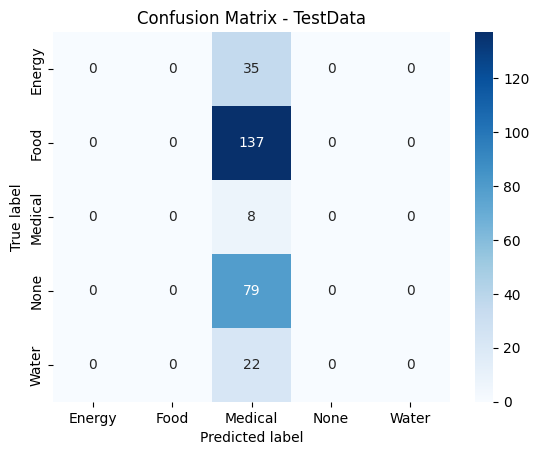

In [ ]:
plot_confusion_matrix(y_test,y_pred)

###Discussion Section 5

Can you explain what it means when a color is darker vs lighter?

Bonus: [The Cat and Mouse Game](http://tangra.cs.yale.edu/naclo/practice/2012A.html)